In [2]:
import pandas as pd
import re
import numpy as np
import pickle

In [3]:
#이것만 실행
# fileObject= open('bad_review', 'r')
# bad_review=pickle.load(fileObject)
# fileObject1= open('good_review', 'r')
# good_review= pickle.load(fileObject1)

fileObject2 = open('review', 'r')
review = pickle.load(fileObject2)

In [6]:
bad_review['y_names']= 'fraud'
good_review['y_names']='normal'

In [8]:
fileObject= open("bad_review",'wb') 
pickle.dump(bad_review,fileObject)   
fileObject.close()

fileObject1 = open("good_review", 'wb')
pickle.dump(good_review, fileObject1)
fileObject1.close()

In [12]:
bad_review.head()

,restaurant name,url,review,y,y_names
0,jū-ni\n,http://www.yelp.com/not_recommended_reviews/j%...,This place is extremely amazing. I won't even ...,1,fraud
1,jū-ni\n,http://www.yelp.com/not_recommended_reviews/j%...,Excellent. I loved the place. It feels very a...,1,fraud
2,The Fine Mousse\n,http://www.yelp.com/not_recommended_reviews/th...,I wish I could give more stars. The service wa...,1,fraud
3,The Fine Mousse\n,http://www.yelp.com/not_recommended_reviews/th...,"Love this place. Was here once with friends, w...",1,fraud
4,The Fine Mousse\n,http://www.yelp.com/not_recommended_reviews/th...,This is too good to resist. Everyone should tr...,1,fraud


In [13]:
good_review.head()

,restaurant name,url,review,y,y_names
0,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,Geoffrey was our chef and he was great - he kn...,0,normal
1,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,I don't think there's anything I have to offer...,0,normal
2,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,My friends took me to Juni for my birthday and...,0,normal
3,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,Geoff appears to have a hit! This is more than...,0,normal
4,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,"Ju-ni, located in the NOPA neighborhood, is on...",0,normal


In [14]:
frame=[good_review,bad_review]
review = pd.concat(frame)

In [18]:
review.index = range(5732)

In [20]:
fileObject2=open('review', 'wb')
pickle.dump(review, fileObject2)
fileObject.close()


In [3]:
review.head()

,restaurant name,url,review,y,y_names
0,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,Geoffrey was our chef and he was great - he kn...,0,normal
1,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,I don't think there's anything I have to offer...,0,normal
2,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,My friends took me to Juni for my birthday and...,0,normal
3,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,Geoff appears to have a hit! This is more than...,0,normal
4,jū-ni,https://www.yelp.com/biz/j%C5%AB-ni-san-franci...,"Ju-ni, located in the NOPA neighborhood, is on...",0,normal


## preprocessing
* 1) Tokenizing text (stop_words = 'english')
* 2) Term-Frequencies Inverse Document-Frequency(tf-idf)
    * **'X_raw' = > 'X' (300x4613 Sparse Mtrix)**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#라벨값 지정
X_raw = review['review']
y_name = review['y_names']
y = review['y']

#dataframe에서 y값이 0인것만 뽑고 싶을때
#review[review.y == "0"].review

In [5]:
#count vect만 사용했을 때, n_gram수는 10개까지
count_vect= CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=3) # 매트릭스 보여주기용
X_counts = count_vect.fit_transform(X_raw)

#word cloud 만들어보기 (fraud랑 non_fraud 각각)
# review lenth 만들어보기
#표로 가장 노출 많은 단어 찾아보기
#유클리드 어쩌구 써서 두 집단 사이 단어 빈도 차이 보기 가장 많이 등장하는 단어 뭔지. testfeature 31장 참고


In [6]:
X_counts # min_df=3 -> train.set split으로 넘어가기

<5732x57978 sparse matrix of type '<type 'numpy.int64'>'
	with 540569 stored elements in Compressed Sparse Row format>

In [14]:
X_counts #min_df=20

<5732x2863 sparse matrix of type '<type 'numpy.int64'>'
	with 250960 stored elements in Compressed Sparse Row format>

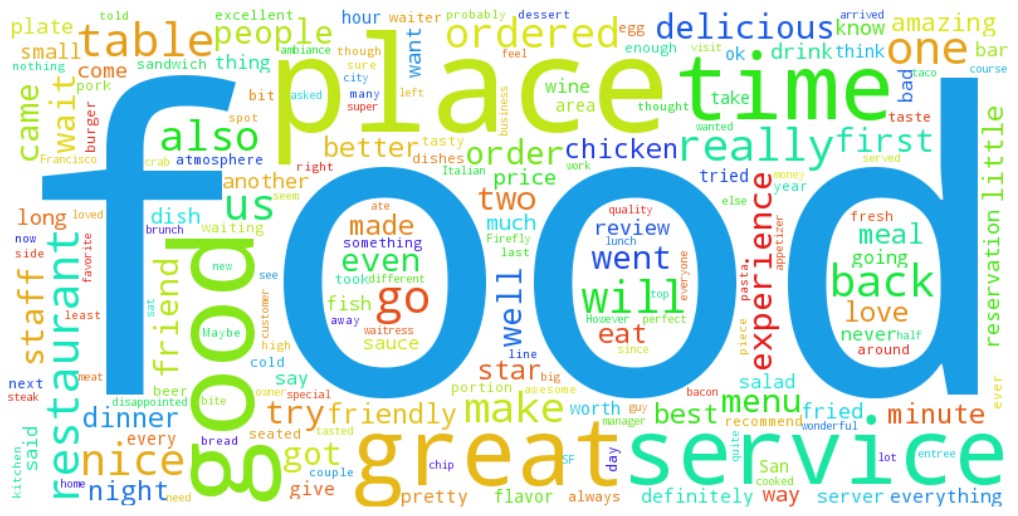

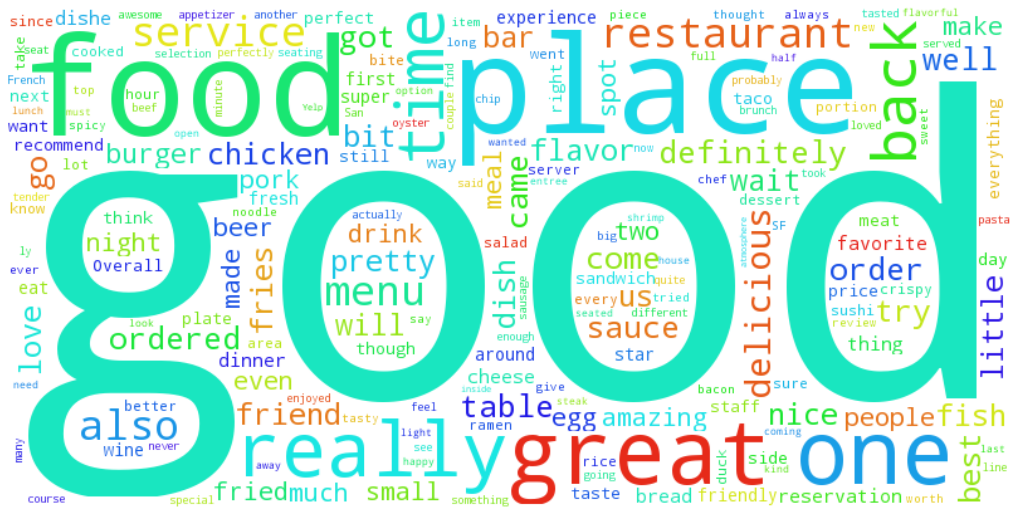

In [36]:
from wordcloud import WordCloud
fraud_text = "".join(review[review.y_names == "fraud"].review)
normal_text= "".join(review[review.y_names == "normal"].review)
wordcloud_fraud = WordCloud(background_color = "white", width=800, height=400).generate(fraud_text)
wordcloud_normal=WordCloud(background_color = "white", width=800, height=400).generate(normal_text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud_fraud)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud_normal)
plt.xticks([])
plt.yticks([])
plt.grid(False)

In [35]:
review[review.y ==0].review.str.len()
review[review.y ==1].review.str.len()
#둘의 분포가 다른가 비교, 평균값/ 표준편차도

2886     482
2887     116
2888     311
2889      67
2890     149
2891     164
2892     111
2893      34
2894     491
2895     581
2896     594
2897    1925
2898     408
2899     295
2900     118
2901     477
2902     147
2903     469
2904     439
2905    1022
2906     766
2907    2654
2908     676
2909     688
2910     176
2911     648
2912     194
2913     293
2914      45
2915     275
        ... 
5702      30
5703     422
5704     309
5705     260
5706     113
5707     917
5708     122
5709     663
5710     470
5711      42
5712     162
5713     452
5714    1577
5715     189
5716     101
5717     147
5718     296
5719     223
5720     304
5721     588
5722     166
5723     146
5724     301
5725      61
5726     113
5727     120
5728     618
5729     469
5730     139
5731     343
Name: review, dtype: int64

# training classifier
본격적 분석. countvectorizer만 사용했을 때, tdidf 사용했을때 비교
* pipeline 사용법 익힐것 ㅜㅜ
* file:///C:/Users/USER/Downloads/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4/%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C/32.ClassificationEvaluation.html
참고


In [41]:
#test랑 train set 분리
# from sklearn.cross_validation import StratifiedShuffleSplit
# X= X_counts
# sss = StratifiedShuffleSplit(y, 10, test_size=0.3, random_state=0)
# len(sss)

10

In [43]:
# for train, test in sss:
#     print("TRAIN:", train, "TEST:", test)
#     X_train, X_test = X[train], X[test]
#     y_train, y_test = y[train], y[test]
    

TRAIN: [4457  826 5503 ..., 2873 4253  520] TEST: [4914 5356 1291 ..., 1416 2059 2760]
TRAIN: [2160 4685 1792 ...,   72 5585 3013] TEST: [1941 2367 1774 ..., 3227 2029 4464]
TRAIN: [1597 5188 2012 ..., 2668 2518 3686] TEST: [3965 2069 3366 ..., 3006 4646 5501]
TRAIN: [2348 4861 2312 ..., 3953 1090 4355] TEST: [4215 1682 2422 ..., 5475 1660  117]
TRAIN: [2688 1556  239 ..., 2851 3994 3800] TEST: [ 221 4204 2516 ..., 5478 2180 5590]
TRAIN: [5209  283 3527 ..., 3568 4437 1674] TEST: [2148 4389 4703 ..., 3111 3375 1467]
TRAIN: [3616 2716  218 ..., 5311 4705 3171] TEST: [4624 3323 5127 ..., 2307 2301 2355]
TRAIN: [5555 2592 2409 ..., 1266 1254  947] TEST: [1662  397 5152 ..., 1095 1122 2722]
TRAIN: [ 959   31  580 ...,  769 5124 5033] TEST: [1075  327 2511 ..., 2197  448 1921]
TRAIN: [3823 5275 1814 ..., 2267 5550 2323] TEST: [1892 3352 5142 ..., 3780 4949 1118]


In [ ]:
# **이건 stratifiedkshuffle 바로했을때

# print(list(y_train).count(0), list(y_train).count(1))
# print(list(y_test).count(0), list(y_test).count(1))

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.3, random_state=42)

In [ ]:
#SVM 의 parameter tuning
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

#what if i already did cv as stratified shuffle? can i skip cv as cv=1?
param_range = np.logspace(-6, -1, 10)
train_scores, validation_scores = validation_curve(
    SVC(), X_train, y_train, param_name='gamma' param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1) #cv stratified kfold로 바꿀것
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation 참조(끝)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis = 1)
validation_scores_mean= np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

#make a plot
plt.figure(figsize=(16,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
#semilogx
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2, color="g")
plt.legend(loc="best");


In [ ]:
#grid search
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#pipeline 예제보고 만드는 법 배우기
#SVC 경우 각 parameter 별 proper range 찾아보기
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# : 위의 3.3.1.1에 precision recall로 구하는 법도 나와있음

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']}, 
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['sigmoid']}, #sig랑 poly clf 뭐 쓰는지 찾아보기
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['polynomial']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
gs = gs.fit(X_train, y_train)

In [ ]:
#이번에는 roc curve 점수
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.3, random_state=42)

gs1 =GridSearchCV (estimator=pipe_svc, param_grid=param_grid, scoring='roc_auc', cv=10,n_job=1)
gs1= gs1.fit(X_train, y_train)


In [ ]:
print(gs.best_score_)
print(gs.best_params_)
print(gs1.best_score_)
print(gs1.best_score_)

In [ ]:
#ROC_CURVE
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds0 = roc_curve(iris.target, model1.decision_function(iris.data)[:, 0], pos_label=0)
fpr1, tpr1, thresholds1 = roc_curve(iris.target, model1.decision_function(iris.data)[:, 1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(iris.target, model1.decision_function(iris.data)[:, 2], pos_label=2)

In [ ]:
#ROC curve 그리기
plt.figure(figsize=(10,10))
plt.plot(fpr0, tpr0, "r-", label="class 0 (perfect)")
plt.plot(fpr1, tpr1, "g-", label="class 1")
plt.plot(fpr2, tpr2, "b-", label="class 2")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
from sklearn import svm
model = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred))

In [ ]:
#내일 할 것 
- good & bad review간 그 거리 구해서 어쩌구 하는거 해보기. 